In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime

In [15]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'NVDA', 'INTC', 'MSFT']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'NVDA', 'INTC', 'MSFT']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
company_list = [AAPL, NVDA, INTC, MSFT]
company_name = ["APPLE", "NVIDIA", "INTEL", "MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-07-02,453.200012,459.589996,453.109985,459.279999,459.279999,13979800,MICROSOFT
2024-07-03,458.190002,461.019989,457.880005,460.769989,460.769989,9932800,MICROSOFT
2024-07-05,459.609985,468.350006,458.970001,467.559998,467.559998,16000300,MICROSOFT
2024-07-08,466.549988,467.700012,464.459991,466.239990,466.239990,12962300,MICROSOFT
2024-07-09,467.000000,467.329987,458.000000,459.540009,459.540009,17207200,MICROSOFT
2024-07-10,461.220001,466.459991,458.859985,466.250000,466.250000,18196100,MICROSOFT
2024-07-11,462.980011,464.779999,451.549988,454.700012,454.700012,23111200,MICROSOFT
2024-07-12,454.329987,456.359985,450.649994,453.549988,453.549988,16311300,MICROSOFT
2024-07-15,453.299988,457.260010,451.429993,453.959991,453.959991,14429400,MICROSOFT


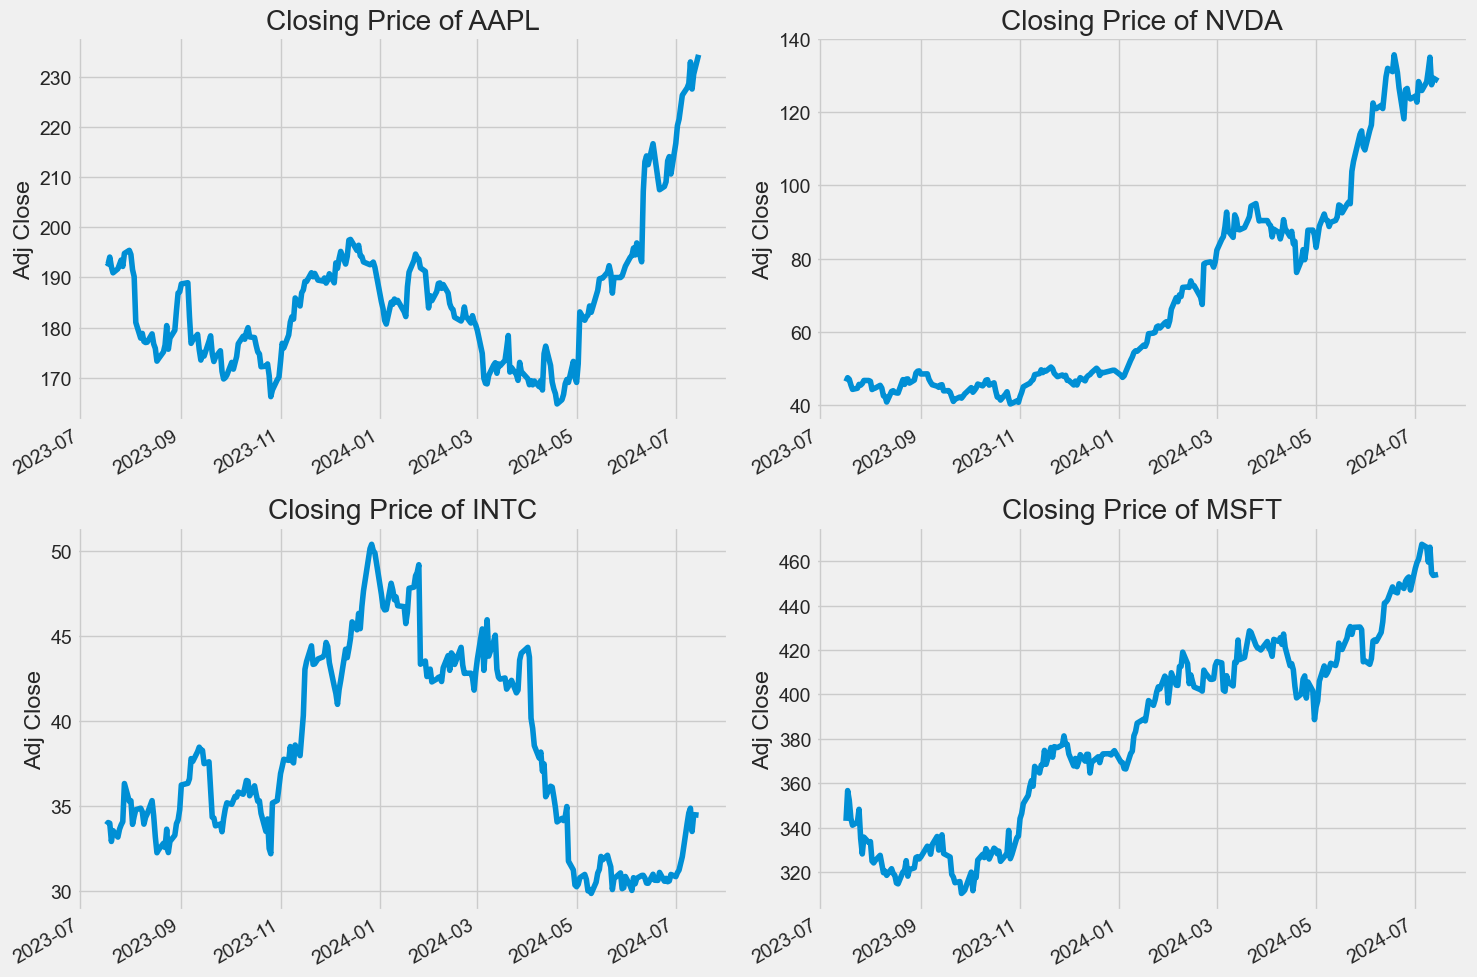

In [4]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

These graphs show the trend of the stocks' closing price since the last one year. We can draw the following insights --
- **AAPL** has had a very **volatile** value over the year but has shown a **sharp increase** in it's value from May 2024.

- The stocks **MSFT** and **NVDA** have shown a **gradual increase** in their value over the year.
  
- **AAPL** and **NVDA** exhibited strong upward trends, especially in the first half of 2024.
- **INTC** was the **most volatile** with significant peaks and troughs, indicating market uncertainty or company-specific issues.
- **MSFT** showed a **steady** increase with some fluctuations, indicating consistent performance with positive market sentiment.

Some Observational Patterns --

- **AAPL**: Seasonal patterns suggest potential spikes around product launch cycles, typically in the fall.
  
- **NVDA**: Increased demand for GPUs and AI technology can drive stock prices.
- **INTC**: Historical performance suggests possible recovery phases following dips, which could be opportunities for buying low.
- **MSFT**: Consistent performance makes it a reliable option for long-term investment.


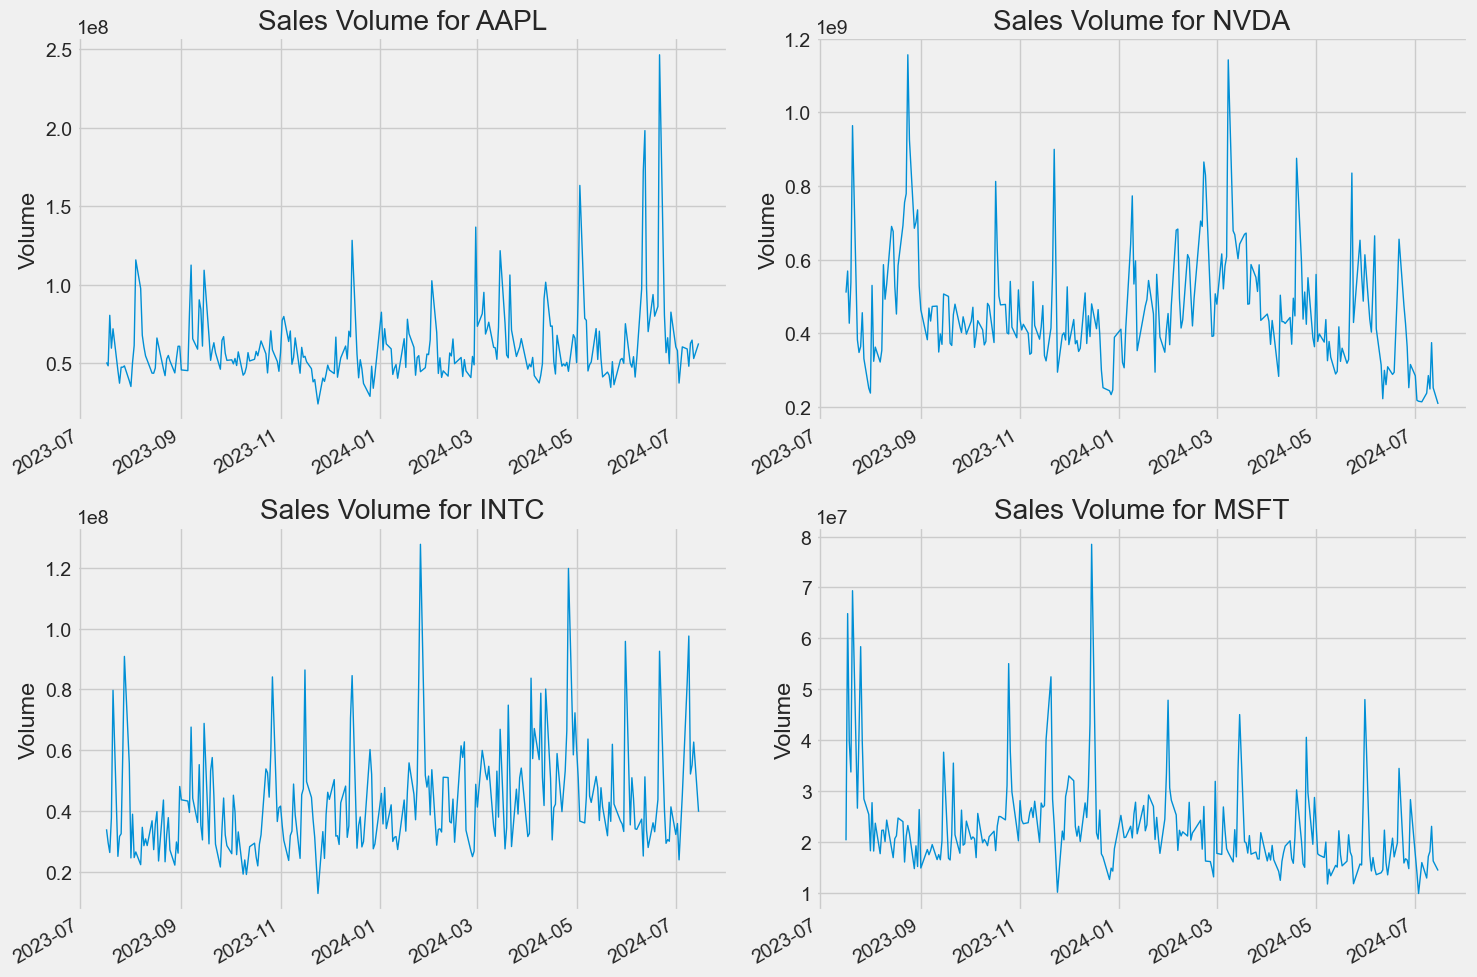

In [5]:

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(linewidth=1)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

**AAPL (Apple Inc.)** --

- Significant spikes in volume are observed around November 2023, May 2024, and July 2024.
- These spikes might correspond to major product launches, earnings reports, or other significant news.
- There is a noticeable increase in trading volume around certain events, indicating high investor interest during these periods.
- The baseline trading volume seems to be relatively stable, with occasional sharp increases.

**NVDA (NVIDIA Corporation)** --

- Several peaks are observed, particularly around August 2023, December 2023, and March 2024. These could be linked to major announcements, product releases, or financial reports.
- The volume remains relatively high, with frequent spikes, indicating sustained investor interest and possibly high volatility during those periods.
- The trading volume is relatively higher compared to the other stocks, suggesting NVDA is actively traded.

**INTC (Intel Corporation)** --

- Notable peaks around October 2023, February 2024, and April 2024. These could be related to key announcements, competitive news, or financial results.
- Frequent spikes suggest high investor activity and potentially higher volatility around these dates.
- The baseline volume fluctuates more than AAPL and MSFT, indicating higher variability in daily trading volume.

**MSFT (Microsoft Corporation)** --

- Significant spikes are observed around September 2023, January 2024, and April 2024. These spikes could be due to major company news, earnings releases, or industry-wide events.
- There is a generally stable trading volume with occasional peaks.
- MSFT has a relatively lower baseline trading volume compared to NVDA but shows a consistent pattern of activity.

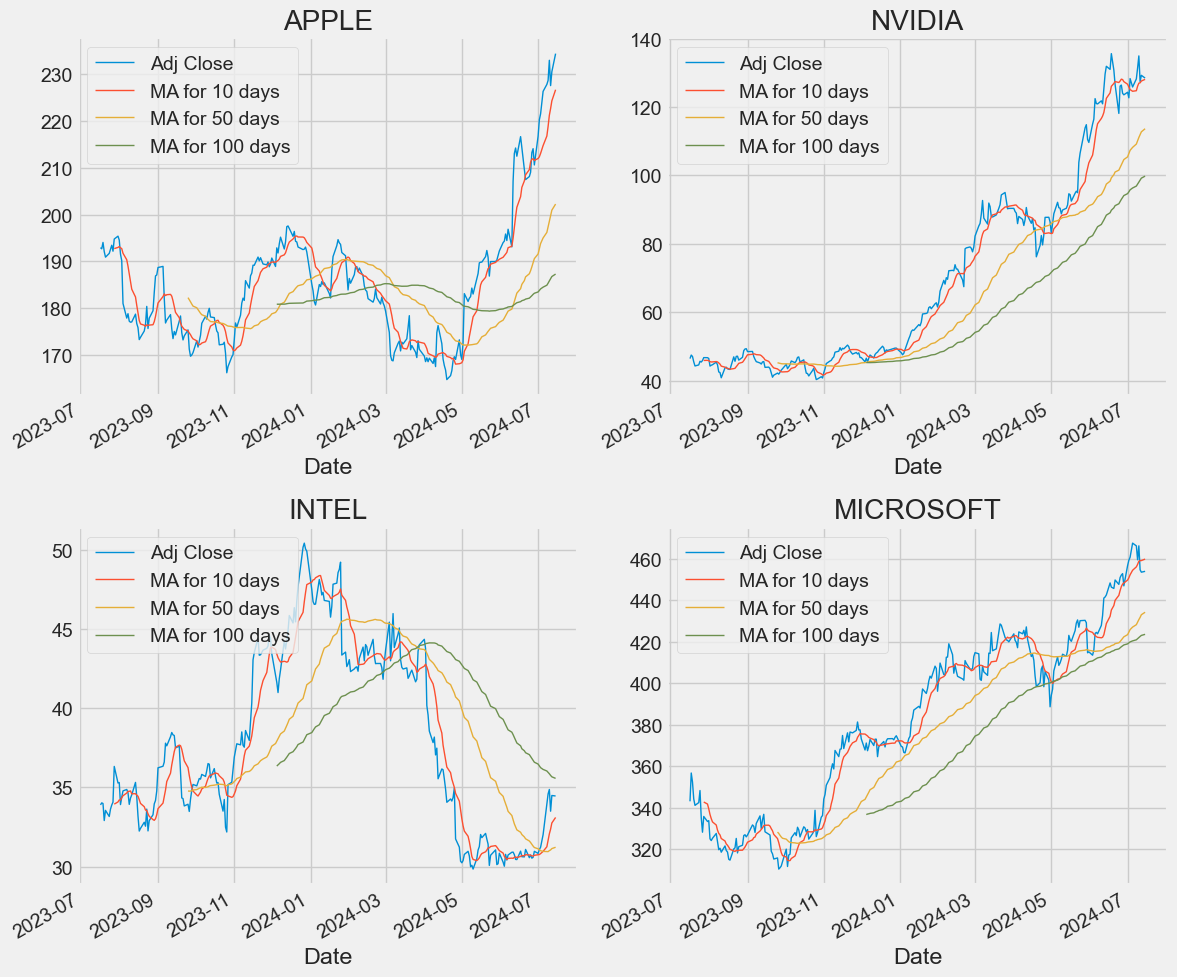

In [6]:
ma_day = [10, 50, 100]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(12)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[0,0], linewidth=1)
axes[0,0].set_title('APPLE')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[0,1], linewidth=1)
axes[0,1].set_title('NVIDIA')

INTC[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[1,0], linewidth=1)
axes[1,0].set_title('INTEL')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[1,1], linewidth=1)
axes[1,1].set_title('MICROSOFT')

fig.tight_layout()

**<u>Moving Averages</u> are a widely used technical analysis tool that smooth out price data to help identify trends by filtering out the noise from random price fluctuations. They are calculated by averaging a specific number of past data points, which moves as new data points are added.**

These moving averages can be used to perform technical analysis to **predict** the future stock price by identifying **trends**, providing support/resistance levels, and **generating buy/sell signals** through crossovers. However, they should be used in conjunction with other technical analysis tools and indicators to improve accuracy.

We can draw the following insights from above --

- Both **AAPL** and **NVDA** exhibit strong **bullish trends** with the 10-day and 50-day moving averages consistently above the 100-day moving averages. These **golden crosses** suggest sustained upward momentum.
  
- Similarly, **MSFT** shows **bullish trends** with all moving averages aligned positively, indicating strong and consistent growth.

- **INTC** exhibits multiple **bearish signals** with the 10-day and 50-day moving averages crossing below the 100-day moving average. The **death cross** around May 2024 indicates potential long-term bearish sentiment.


<u>Strategic Recommendations</u> --

- <u>Growth Strategy</u> - **Focus** on **AAPL, NVDA, and MSFT** due to their strong upward trends and positive moving average alignments.

- <u>Risk Management</u> - For **INTC**, consider setting **stop-loss orders** to mitigate potential losses given its high volatility and bearish indicators.

- <u>Long-Term Investment</u> - **MSFT** appears to be a **stable long-term investment** due to its consistent upward trend and alignment of moving averages.

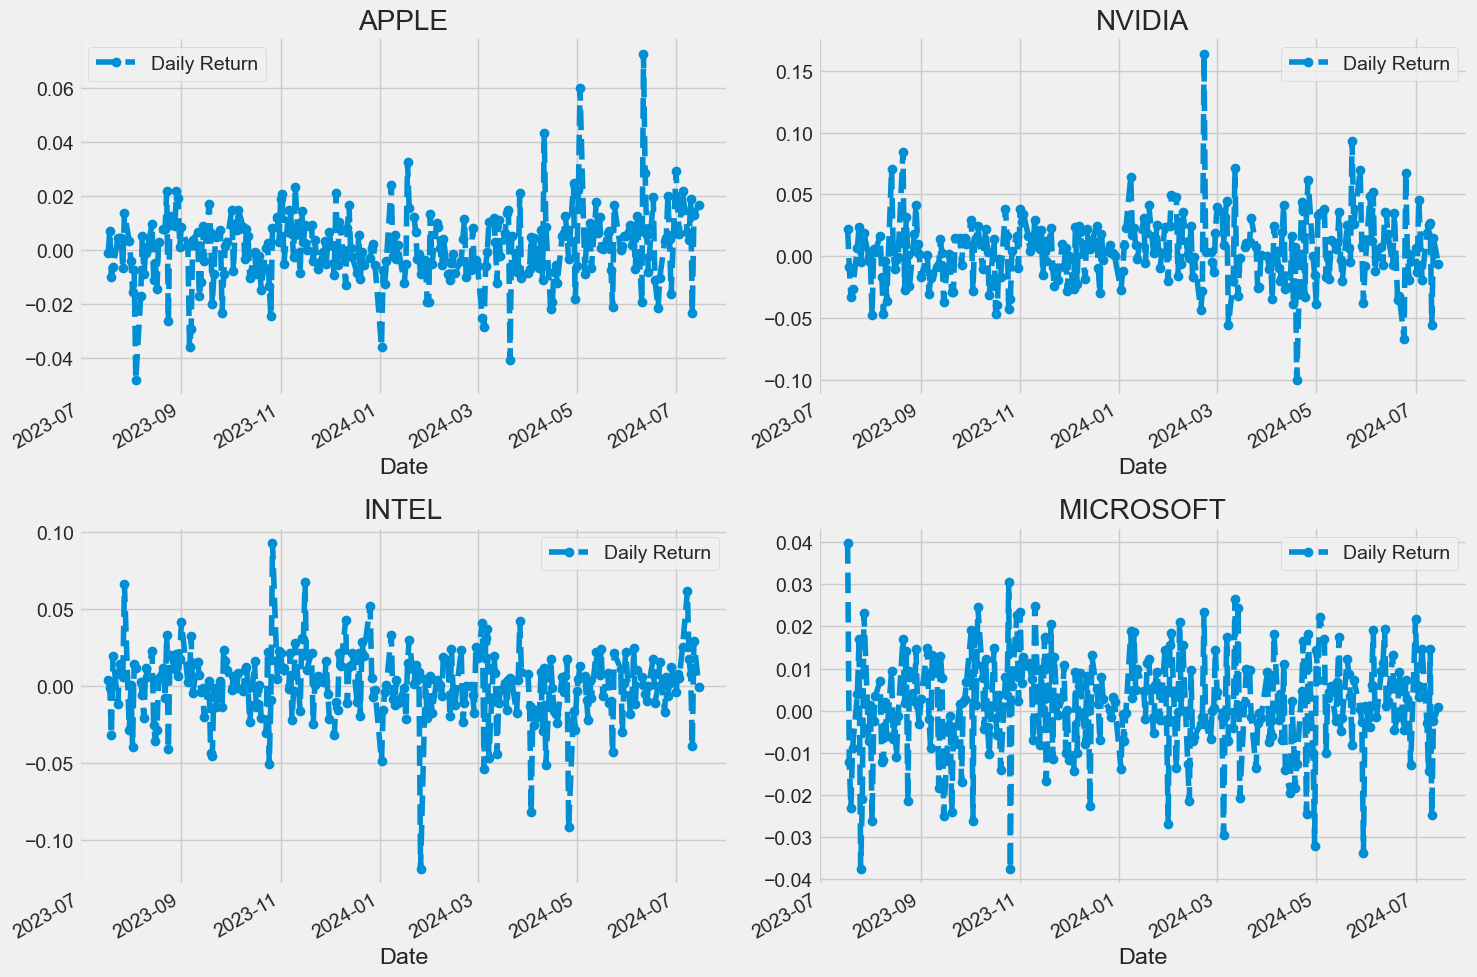

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

NVDA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('NVIDIA')

INTC['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('INTEL')

MSFT['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('MICROSOFT')

fig.tight_layout()

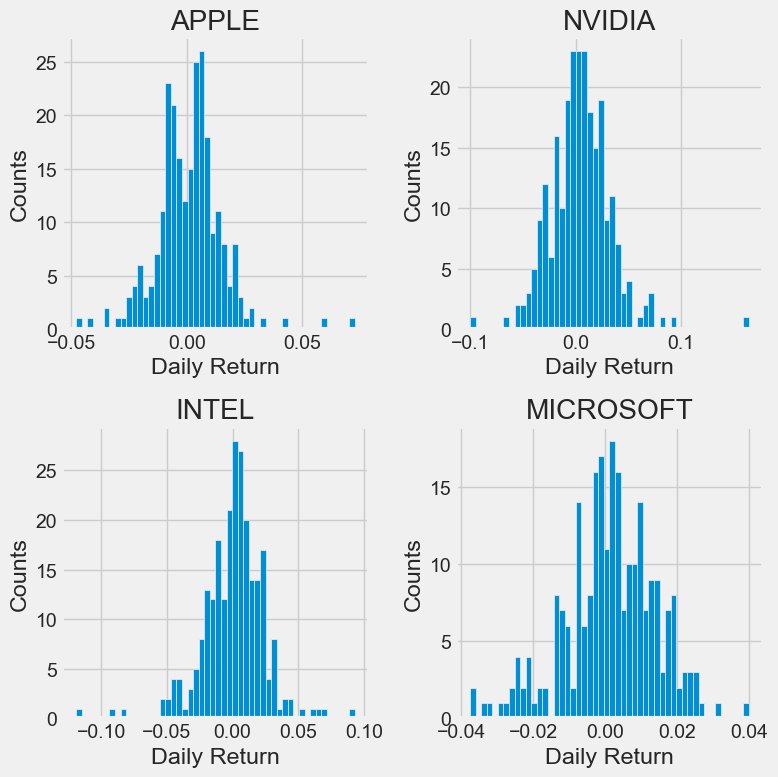

In [8]:
plt.figure(figsize=(8, 8))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Spikes in daily returns across all stocks suggest sensitivity to market events or company-specific news, with **NVDA** and **INTC** being the most affected. The following are the trends identified on the basis of Daily Returns.

- **NVDA** and **INTC** exhibit the **highest volatility** with frequent and significant spikes in daily returns.

- **AAPL** shows **moderate volatility** with occasional spikes, particularly around May 2024.

- **MSFT** has the **lowest volatility**, indicating stable performance with fewer extreme changes in daily returns.

In [9]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,INTC,MSFT,NVDA
Date,,,,
2023-07-17,NaN,NaN,NaN,NaN
2023-07-18,-0.001340,0.003782,0.039800,0.022234
2023-07-19,0.007072,-0.001159,-0.012267,-0.008780
2023-07-20,-0.010097,-0.031631,-0.023121,-0.033073
2023-07-21,-0.006162,0.019479,-0.008937,-0.026604


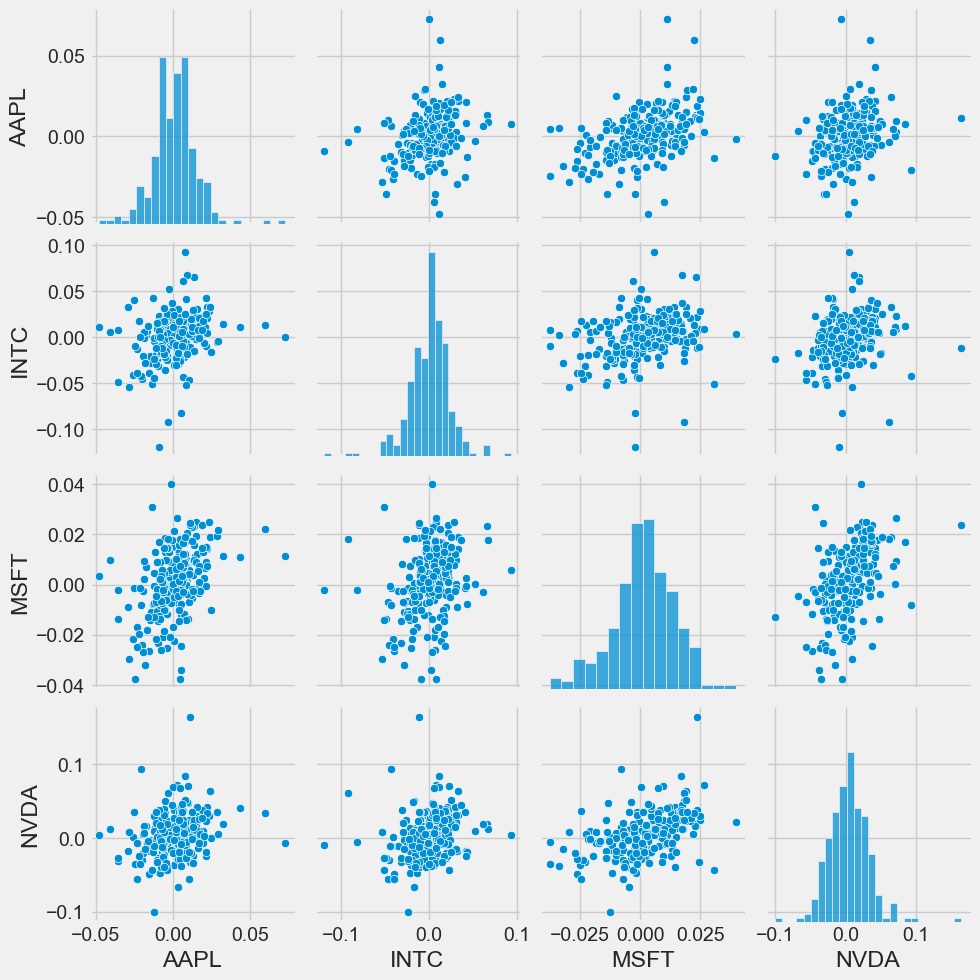

In [10]:
sns.pairplot(tech_rets, kind='scatter')
fig.tight_layout()

**This Scatterplot Matrix depicts the pairwise relationship and distribution of the Daily Returns of the 4 stock companies.**

- The presence of positive correlations among these tech stocks suggests that they may be influenced by common market factors or sector-specific news, leading to similar movement patterns.

- **AAPL** and **MSFT** show the **strongest** positive correlation, indicating they often move in the same direction.

- **INTC** exhibits higher volatility, suggesting **more significant** daily return variations.

- The overall positive correlations among these stocks imply that sector-wide events or trends likely impact their performance similarly.

- These insights can be **valuable** for <u>portfolio diversification and risk management</u>, indicating that while these stocks tend to move together, **INTC's** higher volatility requires **<u>careful consideration</u>**.

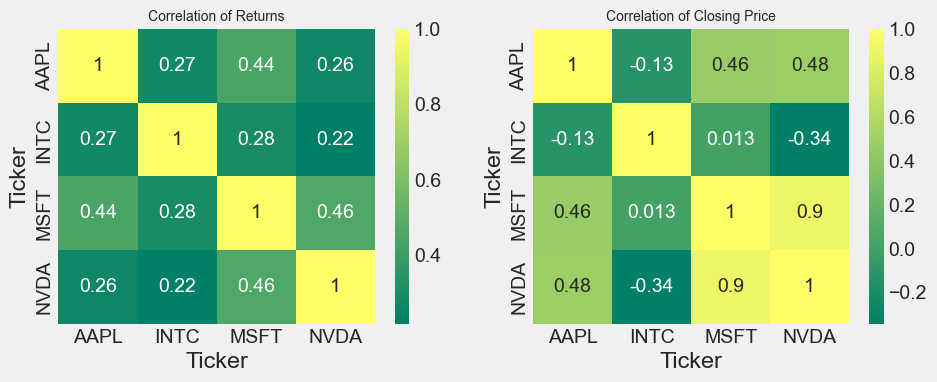

In [11]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Returns', fontsize = '10')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Closing Price', fontsize = '10')
fig.tight_layout()

The following heatmaps show the relation between our selected companies when it comes to returns and their closing price trends. 

As we can see in the Trends of <u>Daily Returns</u> --

- All of the companies are **positive** related when it comes to returns.

- The pairs, **[AAPL, MSFT]** and **[MSFT, NVDA]** have almost same correlation ratio.

- But, when we look at **[AAPL,NVDA]** the ratio drops significantly. This is possible due to slight difference in the values of return.



Now, when we look at the Trends of <u>Closing Prices</u> --

- There are some **negative** relations as well as some positive ones.

- **[MSFT,NVDA]** show the **strongest relation** when it comes to closing prices, as we can also observed this above in the graphs. We can draw a conclusion saying, if we own both of these stocks, we can expect an **overall higher return** which makes it a **ideal pair** to be in a portfolio.

- On the other hand, **[NVDA, INTL]** show a **negative** relation ratio, which was observed above in the graphs since they have opposite slopes at the some given time. So, in Inference, if someone owns this pairing of stocks, it could impact their returns negatively.
- The same can be said for **[AAPL, INTC]** but with a **less negative impact**.
- The pairings **[AAPL, MSFT]** and **[AAPL, NVDA]** also show a **good positive ratio** and can be good suggestions for a portfolio.

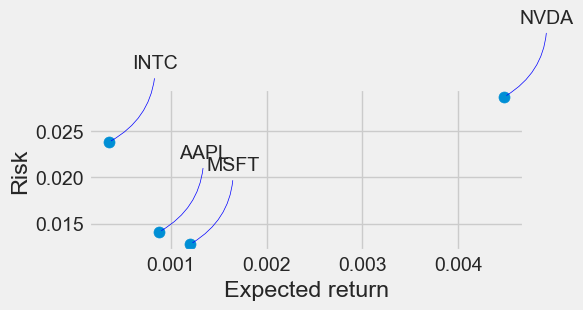

In [12]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(5, 2))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

This above graph shows that how much the following company stock invite risks to invest in with comparison to their expected returns they provide. As shown above, the company wise analysis is as follows:

- Nvidia shows High Risk and High Returns.
- Intel shows High Risk and Low Returns.
- Apple shows Low Risk and Low Returns.
- Microsoft shows slighty Lower Risk than Apple and more Returns than Apple.

When all are compared, **Microsoft(MSFT)** is an safe choice of stock to invest in since even though it has **less returns** when compared to Nvidia, it also has the **lowest risk of loss** when compared to all of the mentioned stock.

#### Data Driven Recommendations --

- Considering the varying risk levels, a diversified portfolio including **AAPL, NVDA, MSFT**, and a cautious stake in **INTC** could balance potential high returns and stability.
  
- Stay updated with company-specific news, earnings reports, and industry trends to make informed decisions on entry and exit points.

- For high-volatility stocks like **INTC**, consider stop-loss orders to mitigate potential losses.

- Focus on long-term growth potential, especially for **AAPL** and **MSFT**, which have shown consistent upward trends.